# Library

In [1]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

In [2]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append(f'E:\gitlab\custom-script\script')
from ursar import fe,feature_importance,describe
%reload_ext autoreload

# Load data

In [3]:
df = pd.read_csv(f"E:/gitlab/machine-learning/dataset/Modal_Antar.csv")

In [4]:
df

,usia,pengambilan_kredit,pengalaman_kerja,jabatan_id,pendapatan,jumlah_tanggungan,pendidikan,kepemilikan,pinjaman,tenor_bulanan,kat_status
0,44,1,7,7,10046300,4,4,5,1000000,1.0,1
1,44,1,7,7,10290000,3,6,1,1000000,1.0,1
2,28,1,5,7,5327891,2,4,2,1000000,1.0,1
3,40,1,7,9,7150000,3,4,1,1000000,1.0,1
4,41,1,3,7,5150000,3,5,1,1000000,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...
128,50,1,3,9,5500000,2,4,1,1000000,1.0,1
129,56,1,7,9,2250000,4,2,1,1000000,1.0,1
130,26,2,5,7,4678138,2,4,1,3000000,6.0,1
131,30,1,3,9,5200000,2,4,1,1000000,1.0,1


In [5]:
describe.describe_data(df)

Pandas Apply:   0%|          | 0/11 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/11 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/11 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/11 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/11 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/11 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/11 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/11 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/11 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/11 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/11 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/11 [00:00<?, ?it/s]

'table size 133 x 11'

Dataframe has 11 columns.
There are 11 columns that have missing values.


,index,Data Type,Count,Missing,% missing,Low value,Q1,Mean,Median,Q3,Hi value,Mode,Stddev,Skewness,Skewness note,Uniques
0,usia,int64,133,0,0.0,21.00,29.00,36.19,37.00,42.00,60.00,28.00,8.72,0.19,Fairly Symmetric (Positive),30
1,pengambilan_kredit,int64,133,0,0.0,1.00,1.00,1.32,1.00,2.00,2.00,1.00,0.47,0.80,Moderately Positively Skewed,2
2,pengalaman_kerja,int64,133,0,0.0,2.00,3.00,4.02,3.00,5.00,7.00,3.00,1.65,0.62,Moderately Positively Skewed,6
3,jabatan_id,int64,133,0,0.0,3.00,7.00,7.83,8.00,9.00,9.00,9.00,1.26,-0.76,Moderately Negatively Skewed,6
4,pendapatan,int64,133,0,0.0,2250000.00,5025000.00,6359096.08,5200000.00,7000000.00,50000000.00,5200000.00,4470641.57,7.28,Highly Positively Skewed,62
5,jumlah_tanggungan,int64,133,0,0.0,1.00,2.00,2.33,2.00,3.00,5.00,2.00,0.98,0.61,Moderately Positively Skewed,5
6,pendidikan,int64,133,0,0.0,2.00,4.00,4.14,4.00,4.00,7.00,4.00,0.87,0.76,Moderately Positively Skewed,6
7,kepemilikan,int64,133,0,0.0,1.00,1.00,1.38,1.00,2.00,5.00,1.00,0.71,2.82,Highly Positively Skewed,4
8,pinjaman,int64,133,0,0.0,1000000.00,1000000.00,2481203.01,1000000.00,5000000.00,10000000.00,1000000.00,2298225.61,1.52,Highly Positively Skewed,4
9,tenor_bulanan,float64,133,0,0.0,1.00,1.00,2.73,1.00,6.00,6.00,1.00,2.39,0.66,Moderately Positively Skewed,2


In [6]:
col = ["pengambilan_kredit","pengalaman_kerja","jabatan_id","jumlah_tanggungan","pendidikan","kepemilikan","tenor_bulanan"]

In [7]:
df1 = fe.change_type(df,col,'object')

In [8]:
describe.describe_data(df1)

Pandas Apply:   0%|          | 0/11 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

'table size 133 x 11'

Dataframe has 11 columns.
There are 11 columns that have missing values.


,index,Data Type,Count,Missing,% missing,Low value,Q1,Mean,Median,Q3,Hi value,Mode,Stddev,Skewness,Skewness note,Uniques
0,usia,int64,133,0,0.0,21.00,29.00,36.19,37.00,42.00,60.00,28.00,8.72,0.19,Fairly Symmetric (Positive),30
1,pengambilan_kredit,object,133,0,0.0,0,0,0,0,0,0,0,0,0,non-numeric,2
2,pengalaman_kerja,object,133,0,0.0,0,0,0,0,0,0,0,0,0,non-numeric,6
3,jabatan_id,object,133,0,0.0,0,0,0,0,0,0,0,0,0,non-numeric,6
4,pendapatan,int64,133,0,0.0,2250000.00,5025000.00,6359096.08,5200000.00,7000000.00,50000000.00,5200000.00,4470641.57,7.28,Highly Positively Skewed,62
5,jumlah_tanggungan,object,133,0,0.0,0,0,0,0,0,0,0,0,0,non-numeric,5
6,pendidikan,object,133,0,0.0,0,0,0,0,0,0,0,0,0,non-numeric,6
7,kepemilikan,object,133,0,0.0,0,0,0,0,0,0,0,0,0,non-numeric,4
8,pinjaman,int64,133,0,0.0,1000000.00,1000000.00,2481203.01,1000000.00,5000000.00,10000000.00,1000000.00,2298225.61,1.52,Highly Positively Skewed,4
9,tenor_bulanan,object,133,0,0.0,0,0,0,0,0,0,0,0,0,non-numeric,2


In [9]:
df1

,usia,pengambilan_kredit,pengalaman_kerja,jabatan_id,pendapatan,jumlah_tanggungan,pendidikan,kepemilikan,pinjaman,tenor_bulanan,kat_status
0,44,1,7,7,10046300,4,4,5,1000000,1,1
1,44,1,7,7,10290000,3,6,1,1000000,1,1
2,28,1,5,7,5327891,2,4,2,1000000,1,1
3,40,1,7,9,7150000,3,4,1,1000000,1,1
4,41,1,3,7,5150000,3,5,1,1000000,1,1
...,...,...,...,...,...,...,...,...,...,...,...
128,50,1,3,9,5500000,2,4,1,1000000,1,1
129,56,1,7,9,2250000,4,2,1,1000000,1,1
130,26,2,5,7,4678138,2,4,1,3000000,6,1
131,30,1,3,9,5200000,2,4,1,1000000,1,1


# feature importance

In [23]:
feature_importance(df,"kat_status",10).decision_tree()

ursar
feature_importance

Decision Tree

time span=  1


            Variables  Importance
0            pinjaman    0.472772
1  pengambilan_kredit    0.212482
2          pendapatan    0.208440
3         kepemilikan    0.069581
4          jabatan_id    0.025132
5                usia    0.011592
6    pengalaman_kerja    0.000000
7   jumlah_tanggungan    0.000000
8          pendidikan    0.000000
9       tenor_bulanan    0.000000


In [24]:
feature_importance(df,"kat_status",10).random_forest()

ursar
feature_importance

Random Forest

time span=  1


            Variables  Importance
0          pendapatan    0.269141
1            pinjaman    0.262253
2                usia    0.080419
3          jabatan_id    0.075305
4       tenor_bulanan    0.070312
5         kepemilikan    0.068395
6    pengalaman_kerja    0.067924
7  pengambilan_kredit    0.051491
8   jumlah_tanggungan    0.033728
9          pendidikan    0.021031


ursar
feature_importance



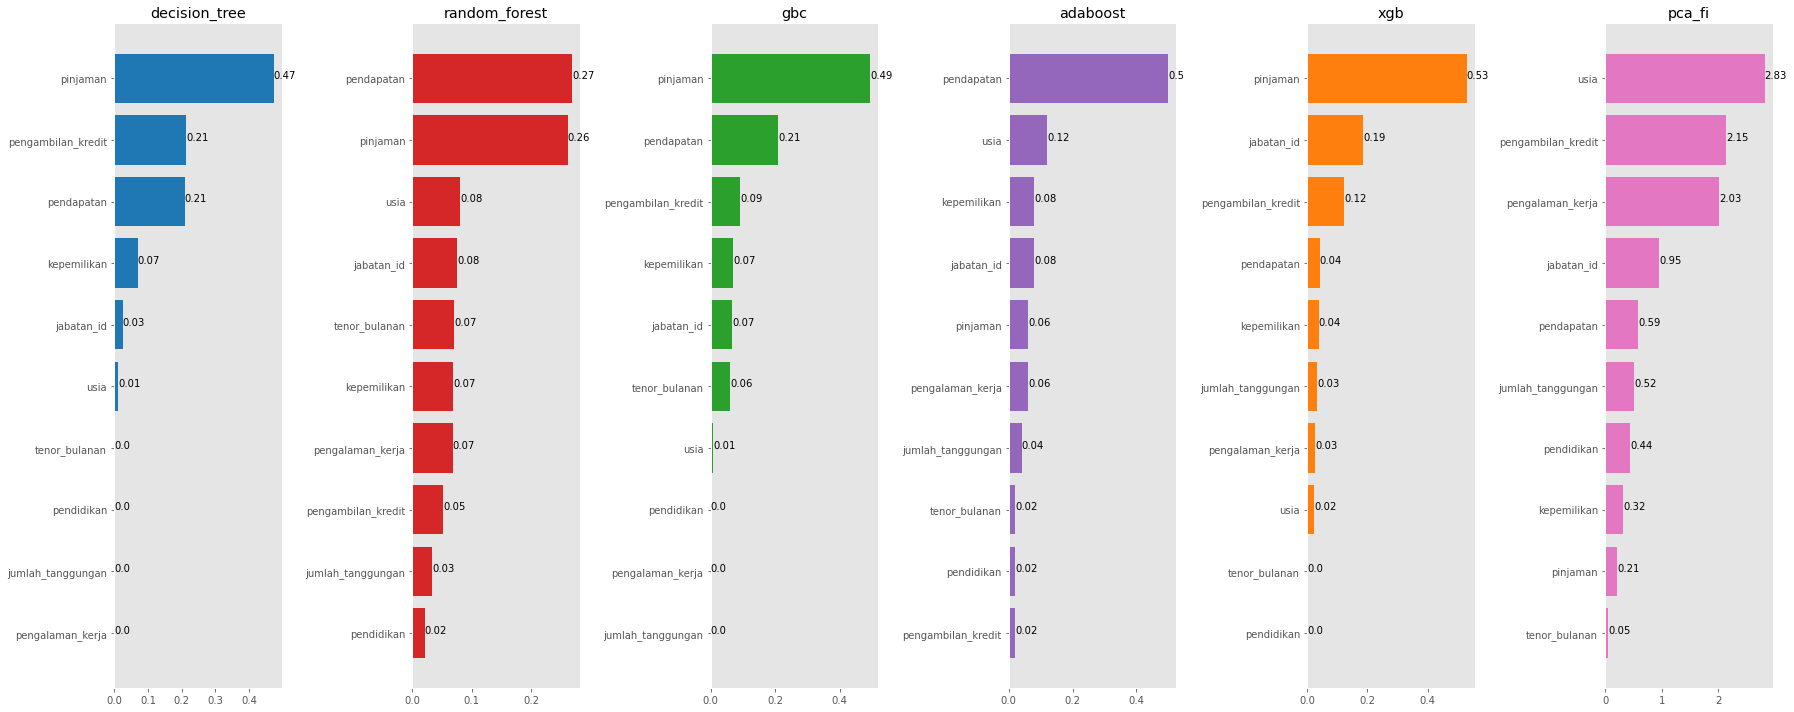

,features,decision_tree,random_forest,gbc,adaboost,xgb,pca_fi
0,usia,0.0116,0.0804,0.0086,0.12,0.0230,2.8296
1,pengambilan_kredit,0.2125,0.0515,0.0912,0.02,0.1225,2.1466
2,pengalaman_kerja,0.0000,0.0679,0.0000,0.06,0.0261,2.0266
3,jabatan_id,0.0251,0.0753,0.0677,0.08,0.1865,0.9545
4,pendapatan,0.2084,0.2691,0.2085,0.50,0.0423,0.5874
5,jumlah_tanggungan,0.0000,0.0337,0.0000,0.04,0.0332,0.5162
6,pendidikan,0.0000,0.0210,0.0000,0.02,0.0000,0.4423
7,kepemilikan,0.0696,0.0684,0.0690,0.08,0.0382,0.3152
8,pinjaman,0.4728,0.2623,0.4939,0.06,0.5281,0.2085
9,tenor_bulanan,0.0000,0.0703,0.0610,0.02,0.0000,0.0489


In [25]:
feature_importance(df1,"kat_status",10).plot_FI(["decision_tree","random_forest","gbc","adaboost","xgb","pca_fi"])

ursar
feature_importance



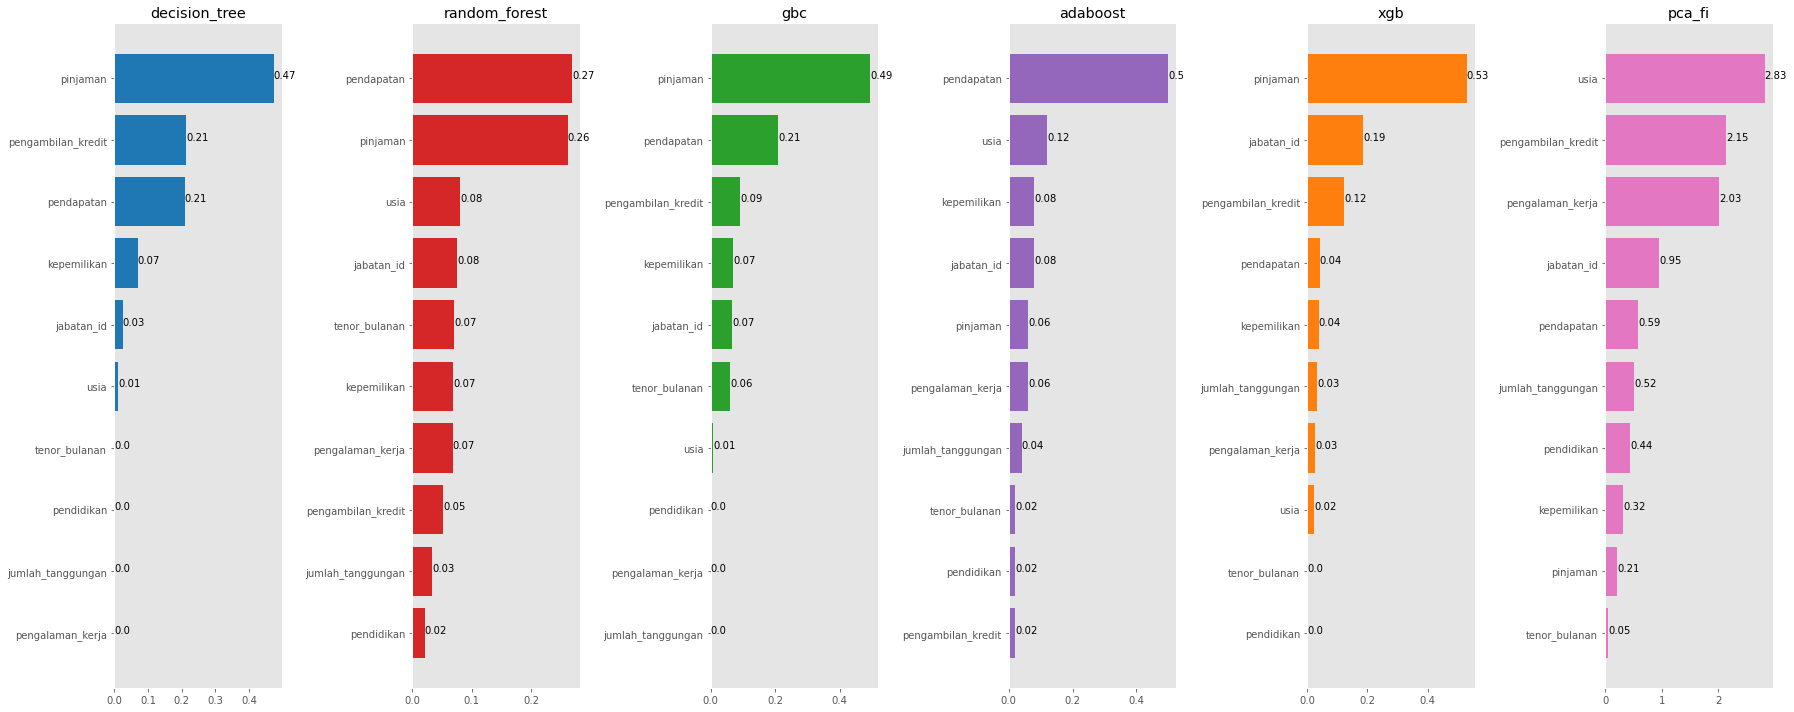

,features,decision_tree,random_forest,gbc,adaboost,xgb,pca_fi
0,usia,0.0116,0.0804,0.0086,0.12,0.0230,2.8296
1,pengambilan_kredit,0.2125,0.0515,0.0912,0.02,0.1225,2.1466
2,pengalaman_kerja,0.0000,0.0679,0.0000,0.06,0.0261,2.0266
3,jabatan_id,0.0251,0.0753,0.0677,0.08,0.1865,0.9545
4,pendapatan,0.2084,0.2691,0.2085,0.50,0.0423,0.5874
5,jumlah_tanggungan,0.0000,0.0337,0.0000,0.04,0.0332,0.5162
6,pendidikan,0.0000,0.0210,0.0000,0.02,0.0000,0.4423
7,kepemilikan,0.0696,0.0684,0.0690,0.08,0.0382,0.3152
8,pinjaman,0.4728,0.2623,0.4939,0.06,0.5281,0.2085
9,tenor_bulanan,0.0000,0.0703,0.0610,0.02,0.0000,0.0489


In [26]:
feature_importance(df,"kat_status",10).plot_FI(["all"])

# random forest mda

In [18]:
feature_importance.rf_mda(df1,"kat_status",nn=10,ts=0.2,rs=None,types='classification')

,features,rf_mda_score
0,pinjaman,0.3102
1,pendapatan,0.2138
2,usia,0.0964
3,pengambilan_kredit,0.0964
4,pengalaman_kerja,0.0964
5,jabatan_id,0.0964
6,jumlah_tanggungan,0.0964
7,pendidikan,0.0964
8,tenor_bulanan,0.0964
9,kepemilikan,0.0000


# VIFis

In [26]:
feature_importance.vif(df,"kat_status")

,features,VIF_Factor
0,pengambilan_kredit,53.6506
1,tenor_bulanan,30.3342
2,jabatan_id,26.3305
3,usia,25.8146
4,pendidikan,24.2064
5,jumlah_tanggungan,12.8187
6,pinjaman,12.6975
7,pengalaman_kerja,10.6593
8,kepemilikan,5.4735
9,pendapatan,4.6335


# F test

In [22]:
ftest,selected_columns,removed_columns=feature_importance.f_test(df1,"kat_status",10)

In [23]:
ftest

,names,scores,pvalues_
0,usia,0.1362,0.7127
1,pengambilan_kredit,5.5765,0.0197
2,pengalaman_kerja,4.4905,0.0360
3,jabatan_id,4.5488,0.0348
4,pendapatan,2.4932,0.1168
5,jumlah_tanggungan,0.0726,0.7880
6,pendidikan,1.7971,0.1824
7,kepemilikan,1.5898,0.2096
8,pinjaman,49.5890,0.0000
9,tenor_bulanan,15.3806,0.0001


# Mutual information

In [11]:
mi,selected_columns,removed_columns=feature_importance.mi_feat(df1,"kat_status",'all')

In [12]:
mi

,names,mi_scores
0,usia,0.0000
1,pengambilan_kredit,0.1260
2,pengalaman_kerja,0.0131
3,jabatan_id,0.2226
4,pendapatan,0.0793
5,jumlah_tanggungan,0.0001
6,pendidikan,0.1737
7,kepemilikan,0.1761
8,pinjaman,0.0963
9,tenor_bulanan,0.1969


# Recursive Feature Elimination

In [14]:
rf = RandomForestClassifier()

In [26]:
rfef,selected_rfe,removed_rfe = feature_importance.rfe(df1,"kat_status", rf, 1, 5, scoring=None)

In [27]:
rfef

,features,scores,grid_scores,pvalues_
0,usia,4,0.903134,False
1,pengambilan_kredit,6,0.954701,False
2,pengalaman_kerja,5,0.954986,False
3,jabatan_id,3,0.954986,False
4,pendapatan,1,0.954986,True
5,jumlah_tanggungan,7,0.954986,False
6,pendidikan,8,0.939886,False
7,kepemilikan,1,0.947293,True
8,pinjaman,1,0.939886,True
9,tenor_bulanan,2,0.939886,False


# feature_selection

In [132]:
result,upper,res_cor = feature_importance.feature_selection(df1,"kat_status")

Original number of features: 11


In [133]:
result

,features,anova_chi,rank
0,usia,0.1362,3.0
1,pendapatan,2.4932,2.0
2,pinjaman,49.5890,1.0
3,pengambilan_kredit,0.8917,4.0
4,pengalaman_kerja,2.9714,2.0
5,jabatan_id,0.9010,3.0
6,jumlah_tanggungan,0.0303,7.0
7,pendidikan,0.3276,6.0
8,kepemilikan,0.5845,5.0
9,tenor_bulanan,28.9601,1.0


In [134]:
res_cor

,features,score,rank
0,usia,0.032227,9.0
1,pengambilan_kredit,0.202066,3.0
2,pengalaman_kerja,0.182050,5.0
3,jabatan_id,0.183189,4.0
4,pendapatan,0.136662,6.0
5,jumlah_tanggungan,0.023535,10.0
6,pendidikan,0.116330,7.0
7,kepemilikan,0.109502,8.0
8,pinjaman,0.524019,1.0
9,tenor_bulanan,0.324149,2.0


In [135]:
upper

,usia,pengambilan_kredit,pengalaman_kerja,jabatan_id,pendapatan,jumlah_tanggungan,pendidikan,kepemilikan,pinjaman,tenor_bulanan,kat_status
usia,NaN,0.115229,0.382211,0.037938,0.066327,0.554932,0.123147,0.288721,0.051414,0.064853,0.032227
pengambilan_kredit,NaN,NaN,0.143860,0.025046,0.013671,0.146979,0.074511,0.065754,0.740318,0.900289,0.202066
pengalaman_kerja,NaN,NaN,NaN,0.125988,0.152988,0.538495,0.027820,0.024176,0.028021,0.073906,0.182050
jabatan_id,NaN,NaN,NaN,NaN,0.532590,0.020021,0.591118,0.206227,0.019358,0.004914,0.183189
pendapatan,NaN,NaN,NaN,NaN,NaN,0.222300,0.418338,0.018609,0.112663,0.029058,0.136662
jumlah_tanggungan,NaN,NaN,NaN,NaN,NaN,NaN,0.064446,0.181988,0.101223,0.132708,0.023535
pendidikan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.215394,0.067532,0.044210,0.116330
kepemilikan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.044001,0.008011,0.109502
pinjaman,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.889696,0.524019
tenor_bulanan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.324149


# Weight of Evidence (WOE) and Information Value (IV)

In [34]:
iv, woe = feature_importance.iv_woe(df1, target = 'kat_status', bins=10, show_woe = True)

Information value of usia is 0.767812


,Variable,Cutoff,N,Events,% of Events,Non-Events,% of Non-Events,WoE,IV
0,usia,"(20.999, 24.0]",15,13,0.103175,2,0.285714,-1.018570,0.185929
1,usia,"(24.0, 28.0]",18,18,0.142857,0,0.071429,0.693147,0.049511
2,usia,"(28.0, 30.6]",7,7,0.055556,0,0.071429,-0.251314,0.003989
3,usia,"(30.6, 33.0]",15,15,0.119048,0,0.071429,0.510826,0.024325
4,usia,"(33.0, 37.0]",19,17,0.134921,2,0.285714,-0.750306,0.113141
5,usia,"(37.0, 39.2]",6,5,0.039683,1,0.142857,-1.280934,0.132160
6,usia,"(39.2, 41.0]",16,16,0.126984,0,0.071429,0.575364,0.031965
7,usia,"(41.0, 44.0]",14,12,0.095238,2,0.285714,-1.098612,0.209259
8,usia,"(44.0, 48.4]",9,9,0.071429,0,0.071429,0.000000,0.000000
9,usia,"(48.4, 60.0]",14,14,0.111111,0,0.071429,0.441833,0.017533


Information value of pengambilan_kredit is 0.754623


,Variable,Cutoff,N,Events,% of Events,Non-Events,% of Non-Events,WoE,IV
0,pengambilan_kredit,1,91,89,0.706349,2,0.285714,0.905117,0.380724
1,pengambilan_kredit,2,42,37,0.293651,5,0.714286,-0.888892,0.373899


Information value of pengalaman_kerja is 0.681385


,Variable,Cutoff,N,Events,% of Events,Non-Events,% of Non-Events,WoE,IV
0,pengalaman_kerja,2,21,21,0.166667,0,0.071429,0.847298,0.080695
1,pengalaman_kerja,3,51,49,0.388889,2,0.285714,0.308301,0.031809
2,pengalaman_kerja,4,12,11,0.087302,1,0.142857,-0.492476,0.027360
3,pengalaman_kerja,5,22,22,0.174603,0,0.071429,0.893818,0.092219
4,pengalaman_kerja,6,8,7,0.055556,1,0.142857,-0.944462,0.082453
5,pengalaman_kerja,7,19,16,0.126984,3,0.428571,-1.216395,0.366849


Information value of jabatan_id is 1.571226


,Variable,Cutoff,N,Events,% of Events,Non-Events,% of Non-Events,WoE,IV
0,jabatan_id,3,1,1,0.007937,0,0.071429,-2.197225,0.139506
1,jabatan_id,5,5,5,0.039683,0,0.071429,-0.587787,0.018660
2,jabatan_id,6,7,6,0.047619,1,0.142857,-1.098612,0.104630
3,jabatan_id,7,52,46,0.365079,6,0.857143,-0.853490,0.419971
4,jabatan_id,8,4,4,0.031746,0,0.071429,-0.810930,0.032180
5,jabatan_id,9,64,64,0.507937,0,0.071429,1.961659,0.856280


Information value of pendapatan is 1.346204


,Variable,Cutoff,N,Events,% of Events,Non-Events,% of Non-Events,WoE,IV
0,pendapatan,"(2249999.999, 4321951.2]",14,13,0.103175,1,0.142857,-0.325422,0.012914
1,pendapatan,"(4321951.2, 5008270.4]",13,13,0.103175,0,0.071429,0.367725,0.011674
2,pendapatan,"(5008270.4, 5044448.4]",13,13,0.103175,0,0.071429,0.367725,0.011674
3,pendapatan,"(5044448.4, 5150000.0]",15,15,0.119048,0,0.071429,0.510826,0.024325
4,pendapatan,"(5150000.0, 5200000.0]",14,14,0.111111,0,0.071429,0.441833,0.017533
5,pendapatan,"(5200000.0, 5340558.8]",11,11,0.087302,0,0.071429,0.200671,0.003185
6,pendapatan,"(5340558.8, 6414368.0]",13,13,0.103175,0,0.071429,0.367725,0.011674
7,pendapatan,"(6414368.0, 7510000.0]",14,14,0.111111,0,0.071429,0.441833,0.017533
8,pendapatan,"(7510000.0, 10089260.0]",12,10,0.079365,2,0.285714,-1.280934,0.264320
9,pendapatan,"(10089260.0, 50000000.0]",14,10,0.079365,4,0.571429,-1.974081,0.971373


Information value of jumlah_tanggungan is 0.641349


,Variable,Cutoff,N,Events,% of Events,Non-Events,% of Non-Events,WoE,IV
0,jumlah_tanggungan,1,25,23,0.182540,2,0.285714,-0.448025,0.046225
1,jumlah_tanggungan,2,60,59,0.468254,1,0.142857,1.187166,0.386300
2,jumlah_tanggungan,3,30,27,0.214286,3,0.428571,-0.693147,0.148532
3,jumlah_tanggungan,4,15,14,0.111111,1,0.142857,-0.251314,0.007978
4,jumlah_tanggungan,5,3,3,0.023810,0,0.071429,-1.098612,0.052315


Information value of pendidikan is 0.374119


,Variable,Cutoff,N,Events,% of Events,Non-Events,% of Non-Events,WoE,IV
0,pendidikan,2,4,4,0.031746,0,0.071429,-0.810930,0.032180
1,pendidikan,3,12,12,0.095238,0,0.071429,0.287682,0.006850
2,pendidikan,4,95,90,0.714286,5,0.714286,0.000000,0.000000
3,pendidikan,5,6,6,0.047619,0,0.071429,-0.405465,0.009654
4,pendidikan,6,15,13,0.103175,2,0.285714,-1.018570,0.185929
5,pendidikan,7,1,1,0.007937,0,0.071429,-2.197225,0.139506


Information value of kepemilikan is 0.573359


,Variable,Cutoff,N,Events,% of Events,Non-Events,% of Non-Events,WoE,IV
0,kepemilikan,1,92,87,0.690476,5,0.714286,-0.033902,0.000807
1,kepemilikan,2,37,36,0.285714,1,0.142857,0.693147,0.099021
2,kepemilikan,4,2,2,0.015873,0,0.071429,-1.504077,0.083560
3,kepemilikan,5,2,1,0.007937,1,0.142857,-2.890372,0.389971


Information value of pinjaman is 3.948522


,Variable,Cutoff,N,Events,% of Events,Non-Events,% of Non-Events,WoE,IV
0,pinjaman,1000000,87,87,0.690476,0,0.071429,2.268684,1.404423
1,pinjaman,3000000,6,5,0.039683,1,0.142857,-1.280934,0.132160
2,pinjaman,5000000,35,33,0.261905,2,0.285714,-0.087011,0.002072
3,pinjaman,10000000,5,1,0.007937,4,0.571429,-4.276666,2.409867


Information value of tenor_bulanan is 2.214159


,Variable,Cutoff,N,Events,% of Events,Non-Events,% of Non-Events,WoE,IV
0,tenor_bulanan,1.0,87,87,0.690476,0,0.071429,2.268684,1.404423
1,tenor_bulanan,6.0,46,39,0.309524,7,1.000000,-1.172720,0.809735


In [35]:
woe

,Variable,Cutoff,N,Events,% of Events,Non-Events,% of Non-Events,WoE,IV
0,usia,"(20.999, 24.0]",15,13,0.103175,2,0.285714,-1.018570,0.185929
1,usia,"(24.0, 28.0]",18,18,0.142857,0,0.071429,0.693147,0.049511
2,usia,"(28.0, 30.6]",7,7,0.055556,0,0.071429,-0.251314,0.003989
3,usia,"(30.6, 33.0]",15,15,0.119048,0,0.071429,0.510826,0.024325
4,usia,"(33.0, 37.0]",19,17,0.134921,2,0.285714,-0.750306,0.113141
5,usia,"(37.0, 39.2]",6,5,0.039683,1,0.142857,-1.280934,0.132160
6,usia,"(39.2, 41.0]",16,16,0.126984,0,0.071429,0.575364,0.031965
7,usia,"(41.0, 44.0]",14,12,0.095238,2,0.285714,-1.098612,0.209259
8,usia,"(44.0, 48.4]",9,9,0.071429,0,0.071429,0.000000,0.000000
9,usia,"(48.4, 60.0]",14,14,0.111111,0,0.071429,0.441833,0.017533


In [36]:
iv

,Variable,IV,rank,explain
0,usia,0.767812,5.0,Suspicious Predictive Power
1,pengambilan_kredit,0.754623,6.0,Suspicious Predictive Power
2,pengalaman_kerja,0.681385,7.0,Suspicious Predictive Power
3,jabatan_id,1.571226,3.0,Suspicious Predictive Power
4,pendapatan,1.346204,4.0,Suspicious Predictive Power
5,jumlah_tanggungan,0.641349,8.0,Suspicious Predictive Power
6,pendidikan,0.374119,10.0,Strong predictive Power
7,kepemilikan,0.573359,9.0,Suspicious Predictive Power
8,pinjaman,3.948522,1.0,Suspicious Predictive Power
9,tenor_bulanan,2.214159,2.0,Suspicious Predictive Power


# Genetic

In [17]:
gen,selected_gen,removed_gen = feature_importance.genetic(df1,"kat_status", rf, 5, scoring='accuracy')

Selecting features with genetic algorithm.
gen	nevals	avg                    	std                    	min                  	max                      
0  	100   	[0.93725926 5.65      ]	[0.01263401 2.64338798]	[0.9022792 1.       ]	[ 0.96980057 10.        ]
1  	60    	[-99.06541311   5.39      ]	[995.08136671   2.716229  ]	[-10000.      0.]    	[ 0.96980057 10.        ]
2  	58    	[0.95107123 4.59      ]    	[0.01362173 2.45395599]    	[0.91054131 1.        ]	[ 0.96980057 10.        ]
3  	59    	[0.95971225 3.33      ]    	[0.01074502 1.76099404]    	[0.91054131 1.        ]	[0.96980057 8.        ]  
4  	59    	[0.96621368 2.46      ]    	[0.00744556 1.43122325]    	[0.92478632 1.        ]	[0.96980057 7.        ]  
5  	68    	[-99.04087464   1.49      ]	[9.95083833e+02 7.93662397e-01]	[-10000.      0.]      	[0.97720798 5.        ]  
6  	50    	[-99.04049573   1.14      ]	[9.95083871e+02 3.74699880e-01]	[-10000.      0.]      	[0.97720798 2.        ]  
7  	70    	[-99.04064957   1.23    

0.9774436090225563

In [27]:
gen

,features,pvalues_
0,usia,False
1,pengambilan_kredit,False
2,pengalaman_kerja,False
3,jabatan_id,True
4,pendapatan,False
5,jumlah_tanggungan,False
6,pendidikan,False
7,kepemilikan,False
8,pinjaman,True
9,tenor_bulanan,False


# combine all

In [24]:
test = feature_importance.score_value(df1,"kat_status",estimator=rf)

ursar
feature_importance



Pandas Apply:   0%|          | 0/1 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

Original number of features: 11


Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/6 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/7 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/8 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/9 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/10 [00:00<?, ?it/s]

In [25]:
test

,features,decision_tree,random_forest,gbc,adaboost,xgb,pca_fi,rf_mda,vif,f_test,mi_scores,rfe,anova_chi,coor,iv,iv_explain,genetic,rank
0,usia,0.0367,0.0589,0.0086,0.12,0.0230,2.8296,0.8045,25.8146,0.1362,0.0000,2,0.1362,0.032227,0.767812,Suspicious Predictive Power,False,6
1,pengambilan_kredit,0.0000,0.0462,0.0998,0.02,0.1225,2.1466,1.5545,53.6506,5.5765,0.0888,6,2.4932,0.202066,0.754623,Suspicious Predictive Power,False,5
2,pengalaman_kerja,0.0000,0.0593,0.0000,0.06,0.0261,2.0266,-0.7500,10.6593,4.4905,0.0000,5,49.5890,0.182050,0.681385,Suspicious Predictive Power,False,7
3,jabatan_id,0.0000,0.0795,0.0657,0.08,0.1865,0.9545,0.7500,26.3305,4.5488,0.0097,4,0.8917,0.183189,1.571226,Suspicious Predictive Power,True,5
4,pendapatan,0.2084,0.2543,0.2105,0.50,0.0423,0.5874,-0.4184,4.6335,2.4932,0.0815,1,2.9714,0.136662,1.346204,Suspicious Predictive Power,False,5
5,jumlah_tanggungan,0.0000,0.0411,0.0000,0.04,0.0332,0.5162,0.7500,12.8187,0.0726,0.0000,7,0.9010,0.023535,0.641349,Suspicious Predictive Power,False,8
6,pendidikan,0.0000,0.0266,0.0000,0.02,0.0000,0.4423,0.7500,24.2064,1.7971,0.1675,8,0.0303,0.116330,0.374119,Strong predictive Power,False,8
7,kepemilikan,0.0696,0.0598,0.0690,0.08,0.0382,0.3152,0.0000,5.4735,1.5898,0.1522,1,0.3276,0.109502,0.573359,Suspicious Predictive Power,False,6
8,pinjaman,0.4728,0.2929,0.4716,0.06,0.5281,0.2085,0.1699,12.6975,49.5890,0.1469,1,0.5845,0.524019,3.948522,Suspicious Predictive Power,True,3
9,tenor_bulanan,0.2125,0.0814,0.0747,0.02,0.0000,0.0489,0.5379,30.3342,15.3806,0.1832,3,28.9601,0.324149,2.214159,Suspicious Predictive Power,False,5


# permutation_imp

ursar
feature_importance

AdaBoostClassifier()


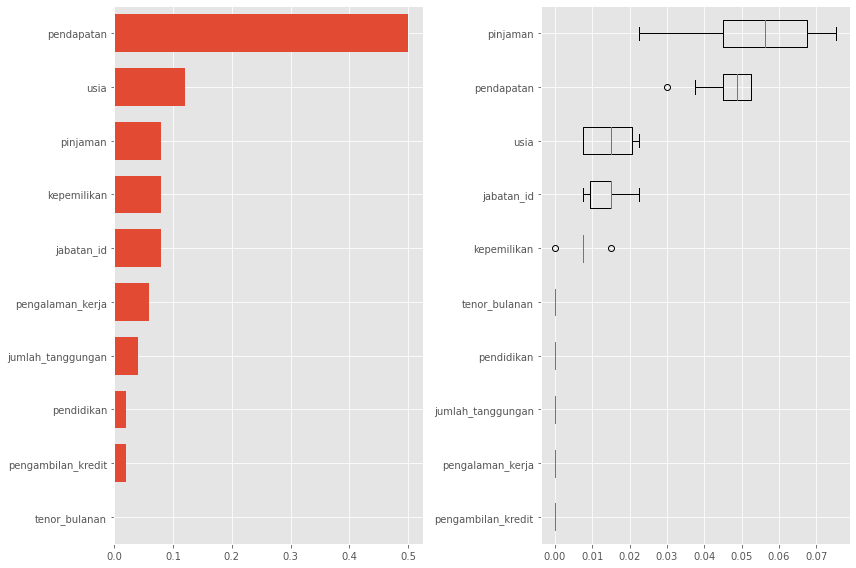


        The permutation importance plot shows that permuting a feature drops the accuracy by at most 0.0752,
        which would suggest that none of the features are important. This is in contradiction with the high test accuracy computed above: some feature must be important.
        The permutation importance is calculated on the training set to show how much the model relies on each feature during training.
        


In [22]:
cols,permute = feature_importance.permutation_imp(df1,"kat_status",fun="adaboost",n_repeats=10,rs=None)

# Handling Multicollinear Features

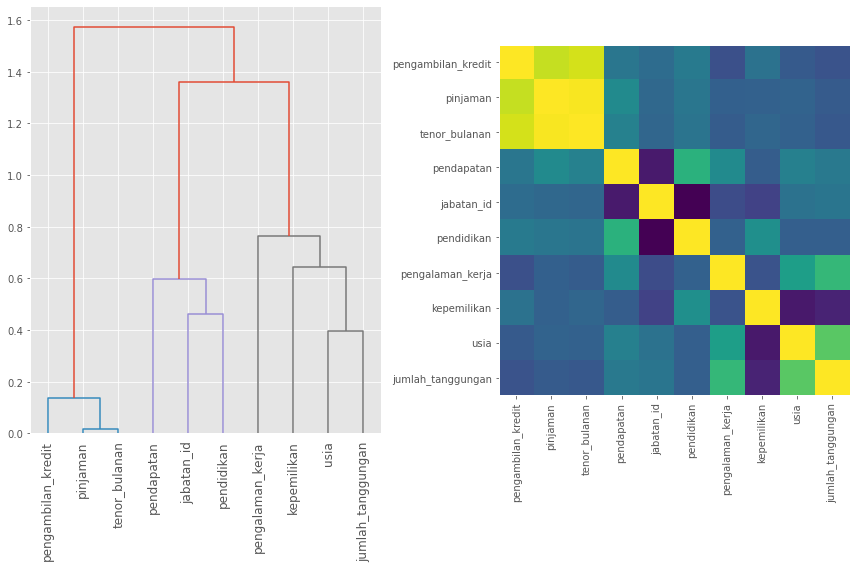

In [44]:
result,selected_features = feature_importance.multicoll(df1,"kat_status")

In [45]:
result

,cluster,features
0,3,"[usia, pengalaman_kerja, jumlah_tanggungan, ke..."
1,1,"[pengambilan_kredit, pinjaman, tenor_bulanan]"
2,2,"[jabatan_id, pendapatan, pendidikan]"
